<a href="https://colab.research.google.com/github/majdzarai/terespo/blob/main/new_potatoesPFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential 
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.optimizers import Adam 
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers

In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/plants",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
)

Found 2152 files belonging to 3 classes.


In [7]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[2 0 1 1 2 0 0 0 1 1 1 0 0 1 0 2 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1]


In [8]:
classes = dataset.class_names
classes

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
for image_batch,label_batch in dataset.take(1):
  print(image_batch[0])

tf.Tensor(
[[[178. 175. 186.]
  [174. 171. 182.]
  [174. 171. 182.]
  ...
  [165. 162. 181.]
  [167. 164. 183.]
  [168. 165. 184.]]

 [[179. 176. 187.]
  [175. 172. 183.]
  [176. 173. 184.]
  ...
  [166. 163. 182.]
  [166. 163. 182.]
  [167. 164. 183.]]

 [[180. 177. 188.]
  [178. 175. 186.]
  [179. 176. 187.]
  ...
  [167. 164. 183.]
  [166. 163. 182.]
  [167. 164. 183.]]

 ...

 [[119.  99. 111.]
  [121. 101. 113.]
  [119.  99. 111.]
  ...
  [121. 107. 122.]
  [118. 104. 119.]
  [120. 106. 121.]]

 [[117.  97. 109.]
  [119.  99. 111.]
  [118.  98. 110.]
  ...
  [120. 106. 121.]
  [116. 102. 117.]
  [117. 103. 118.]]

 [[122. 102. 114.]
  [125. 105. 117.]
  [125. 105. 117.]
  ...
  [117. 103. 118.]
  [112.  98. 113.]
  [113.  99. 114.]]], shape=(256, 256, 3), dtype=float32)


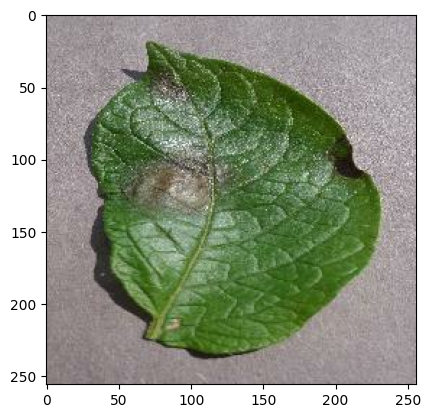

In [10]:
for image_batch,label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))

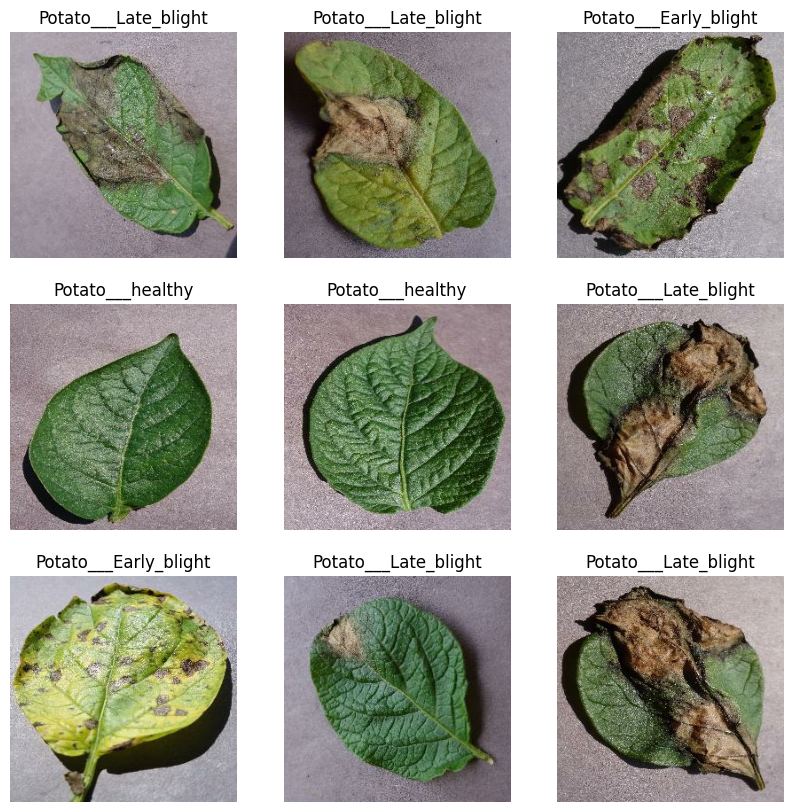

In [11]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
  for i in range (9):
    x = plt.subplot(3, 3, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(classes[label_batch[i]])
    plt.axis("off")


In [12]:
len(dataset)

68

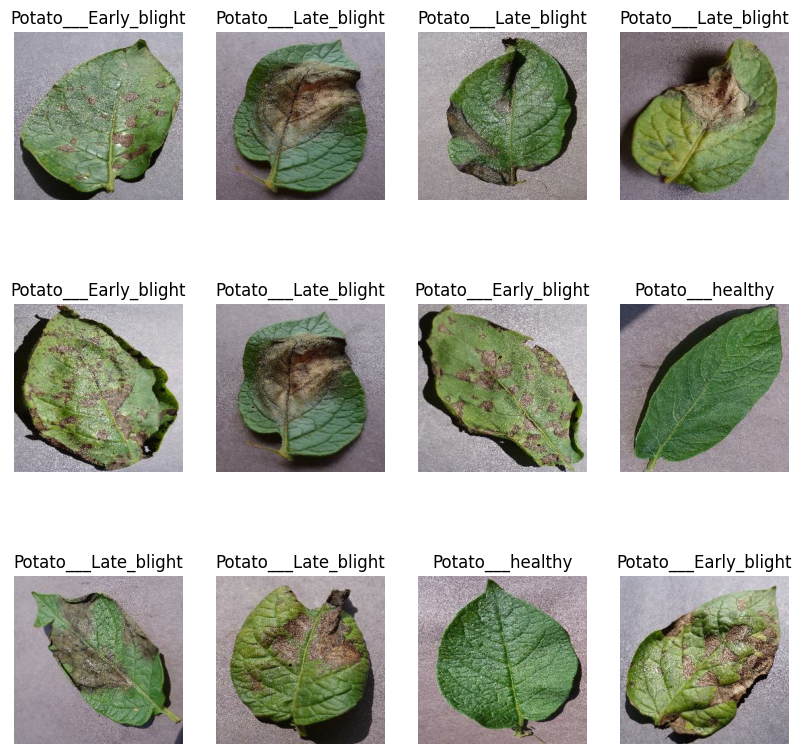

In [15]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(2):
  for i in range (12):
    x = plt.subplot(3, 4, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(classes[label_batch[i]])
    plt.axis("off")

In [48]:
EPOCHES = 50

In [42]:
CHANNELS = 3

In [22]:
def splitting (ds, train_split = 0.8, validation_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(dataset)
    if shuffle :
      ds=ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(validation_split * ds_size)
    train_ds = dataset.take(train_size)
    val_ds= dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds 


In [23]:
train_ds, val_ds, test_ds = splitting(dataset)

In [24]:
len(train_ds)

54

In [25]:
len(val_ds)

6

In [26]:
len(test_ds)

8

In [32]:
resizing_rescaling = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE), 
  layers.experimental.preprocessing.Rescaling(1.0/255),

])

In [34]:
augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),

])

In [ ]:
CHANNELS = 

In [43]:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classe= 3

In [44]:
model = models.Sequential([
    resizing_rescaling,
    augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classe, activation='softmax'),
])
model.build(input_shape=input_shape)

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     multiple                  0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_13 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                 

In [47]:
model.compile(
    optimizer= 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [49]:
history = model.fit(
    train_ds,
    epochs = EPOCHES,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data=val_ds

)

Epoch 1/50
54/54 [==============================] - 272s 5s/step - loss: 0.8766 - accuracy: 0.4890 - val_loss: 0.8124 - val_accuracy: 0.6458
Epoch 2/50
54/54 [==============================] - 265s 5s/step - loss: 0.6418 - accuracy: 0.7025 - val_loss: 0.5175 - val_accuracy: 0.7552
Epoch 3/50
54/54 [==============================] - 266s 5s/step - loss: 0.5131 - accuracy: 0.7587 - val_loss: 0.4042 - val_accuracy: 0.8438
Epoch 4/50
54/54 [==============================] - 264s 5s/step - loss: 0.4017 - accuracy: 0.8316 - val_loss: 0.3616 - val_accuracy: 0.8229
Epoch 5/50
54/54 [==============================] - 265s 5s/step - loss: 0.3504 - accuracy: 0.8559 - val_loss: 0.2791 - val_accuracy: 0.8906
Epoch 6/50
54/54 [==============================] - 262s 5s/step - loss: 0.2756 - accuracy: 0.8947 - val_loss: 0.2777 - val_accuracy: 0.8854
Epoch 7/50
54/54 [==============================] - 263s 5s/step - loss: 0.4174 - accuracy: 0.8374 - val_loss: 0.6098 - val_accuracy: 0.7812
Epoch 8/50
54